In [1]:
!pip install pyautogen
!pip install python-dotenv
!pip install "pyautogen[anthropic]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.2/350.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.9/313.9 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.4/198.4 kB 4.4 MB/s eta 0:00:00


In [15]:
import os
import time
from google.colab import userdata
from autogen import ConversableAgent
from autogen import AssistantAgent
from autogen import UserProxyAgent
os.environ['OPENAI_API_KEY'] = userdata.get('OPEN_API_KEY')
os.environ['ANTHROPIC_API_KEY'] = userdata.get('ANTHROPIC_API_KEY')

In [16]:
config_list_gpt = [
    {
        "model": "gpt-4o-mini",
        "api_key": os.getenv("OPENAI_API_KEY")
    }
]
config_list_claude = [
    {
        "model": "claude-3-5-sonnet-20240620",
        "api_key": os.getenv("ANTHROPIC_API_KEY"),
        "api_type": "anthropic",
    }
]


In [18]:
assistant = AssistantAgent(
    name="assistant",
    llm_config={"seed": 42,
                "config_list" : config_list_gpt,
                "temperature":0},

)

user_proxy = UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={"work_dir": "coding",
                           "use_docker": False},
)
time.sleep(2)

user_proxy.initiate_chat(
    assistant,
    message="""calculate the trend of Nvidia stock and give suggestions for buying or selling.""",
)


user_proxy (to assistant):

calcaute the trend of Nvidia stock and give suggestions for buying or selling.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To analyze the trend of Nvidia stock and provide suggestions for buying or selling, I will follow these steps:

1. **Collect Historical Stock Data**: I will fetch the historical stock price data for Nvidia (ticker symbol: NVDA) using a financial data API.
2. **Analyze the Data**: I will analyze the data to identify trends, such as moving averages or price changes over time.
3. **Provide Recommendations**: Based on the analysis, I will provide suggestions for buying or selling.

Let's start by collecting the historical stock data for Nvidia. I will use the `yfinance` library to fetch this data. 

Please execute the following Python code to install the required library and fetch the historical stock data for Nvidia:

```python
# filename: fetch_nvidia_stock.py
import yfinanc

ChatResult(chat_id=None, chat_history=[{'content': 'calcaute the trend of Nvidia stock and give suggestions for buying or selling.', 'role': 'assistant', 'name': 'user_proxy'}, {'content': 'To analyze the trend of Nvidia stock and provide suggestions for buying or selling, I will follow these steps:\n\n1. **Collect Historical Stock Data**: I will fetch the historical stock price data for Nvidia (ticker symbol: NVDA) using a financial data API.\n2. **Analyze the Data**: I will analyze the data to identify trends, such as moving averages or price changes over time.\n3. **Provide Recommendations**: Based on the analysis, I will provide suggestions for buying or selling.\n\nLet\'s start by collecting the historical stock data for Nvidia. I will use the `yfinance` library to fetch this data. \n\nPlease execute the following Python code to install the required library and fetch the historical stock data for Nvidia:\n\n```python\n# filename: fetch_nvidia_stock.py\nimport yfinance as yf\n\n# F

In [20]:
user_proxy.send(recipient=assistant,
                message="""Plot the generated visualization with indications for selling or buying and save to nvidia_stock.png""" )

user_proxy (to assistant):

Plot the generated visualization with indications for selling or buying and save to nvidia_stock.png

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot the generated visualization with indications for buying or selling and save it as `nvidia_stock.png`, I will modify the previous code to include annotations for buy and sell signals based on the moving averages. 

Please execute the following Python code:

```python
# filename: plot_nvidia_stock_with_signals.py
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical data for Nvidia
nvidia_stock = yf.Ticker("NVDA")
historical_data = nvidia_stock.history(period="1y")

# Calculate moving averages
historical_data['20_MA'] = historical_data['Close'].rolling(window=20).mean()
historical_data['50_MA'] = historical_data['Close'].rolling(window=50).mean()

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(hist

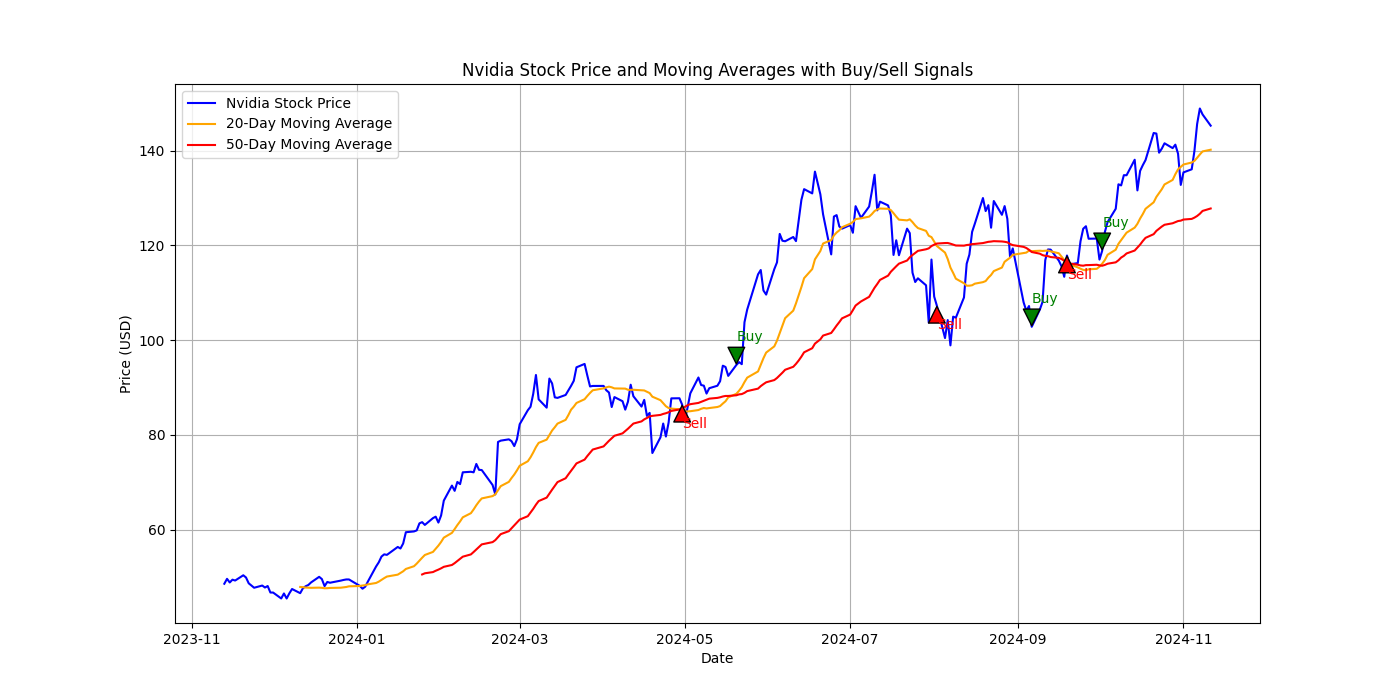

In [21]:
from IPython.display import Image
Image(filename='coding/nvidia_stock.png')